In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', size=15)

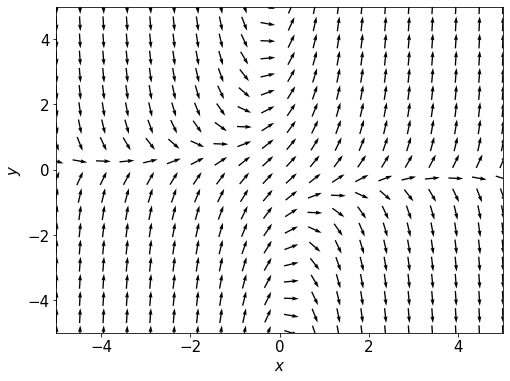

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

#Vector field
X, Y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
U = 1
V = 1 + X * Y
#Normalize arrows
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

ax.quiver(X, Y, U, V, scale=30, pivot='mid')

plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

https://stackoverflow.com/questions/18832763/drawing-directions-fields

In [2]:
from scipy.integrate import odeint

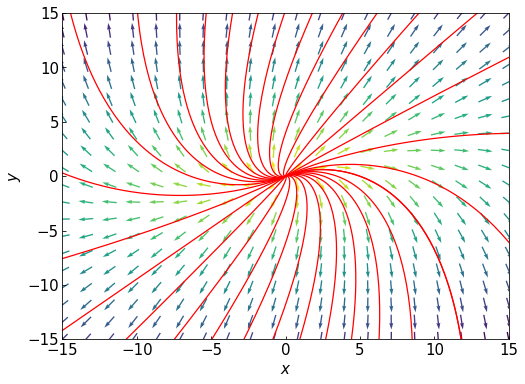

In [25]:
from scipy.integrate import ode
fig, ax = plt.subplots(figsize=(8, 6))

#Vector field
X, Y = np.meshgrid(np.linspace(-15, 15, 20), np.linspace(-15, 15, 20))
U = 2 * X + Y
V = - X  + 4 * Y
#Normalize arrows
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

ax.quiver(X, Y, U, V, N, scale=30, pivot='mid', cmap='viridis_r')

## Vector field function
def vf(t,x):
    dx=np.zeros(2)
    dx[0] = 2 * x[0] + x[1]
    dx[1] = - x[0] + 4 * x[1]
    return dx

#Solution curves
t0 = 0
tEnd = 10
dt = 0.01
r = ode(vf).set_integrator('vode', method='bdf', max_step=dt)
#### Need to tweak the initial conditions here ###
'''
x_ini = np.linspace(-5, 5, 10)
y_ini = np.linspace(-5, 5, 10)
for x_ic in x_ini:
    for y_ic in y_ini:
        Y = []
        T = []
        S = []
        r.set_initial_value([x_ic, y_ic], t0).set_f_params()
        while r.successful() and r.t + dt < tEnd:
            r.integrate(r.t + dt)
            Y.append(r.y)

        S=np.array(np.real(Y))
        ax.plot(S[:,0],S[:,1], color = 'blue', lw = 1.25)
        
'''

radius = 5
for theta in np.linspace(0, 2*np.pi, 30):
    x_ini = radius * np.cos(theta)
    y_ini = radius * np.sin(theta)
    
#for ic in [[0, 1], [0, 7], [3, 5], [5, 8], [8, 8], [12, 8], [12, 3], [15, 0], [-5, -5], [-5, -3], [-5, -7], [-5, -10], [-5, -15], [-5, -20], [-5, -2]]:
#    x_ini, y_ini = ic
    Y = []
    T = []
    S = []
    r.set_initial_value([x_ini, y_ini], t0).set_f_params()
    while r.successful() and r.t - dt > -10:
        r.integrate(r.t - dt)
        Y.append(r.y)

    Y = Y[::-1]
    r.set_initial_value([x_ini, y_ini], t0).set_f_params()
    while r.successful() and r.t + dt <= tEnd:
        r.integrate(r.t + dt)
        Y.append(r.y)

    S = np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = 'red', lw = 1.25)
    

plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.tick_params(direction='in')
plt.show()

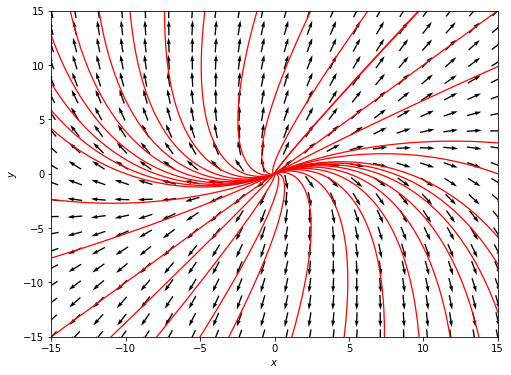

In [7]:
from scipy.integrate import ode
fig, ax = plt.subplots(figsize=(8, 6))

#Vector field
X, Y = np.meshgrid(np.linspace(-15, 15, 20), np.linspace(-15, 15, 20))
U = 2 * X + Y
V = - X + 4 * Y
#Normalize arrows
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

ax.quiver(X, Y, U, V, scale=30, pivot='mid')

## Vector field function
def vf(t,x):
    dx=np.zeros(2)
    dx[0] = 2 * x[0] + x[1]
    dx[1] = - x[0] + 4 * x[1]
    return dx

#Solution curves
t0 = 0
tEnd = 10
dt = 0.01
r = ode(vf).set_integrator('vode', method='bdf', max_step=dt)
#### Need to tweak the initial conditions here ###
'''
x_ini = np.linspace(-5, 5, 10)
y_ini = np.linspace(-5, 5, 10)
for x_ic in x_ini:
    for y_ic in y_ini:
        Y = []
        T = []
        S = []
        r.set_initial_value([x_ic, y_ic], t0).set_f_params()
        while r.successful() and r.t + dt < tEnd:
            r.integrate(r.t + dt)
            Y.append(r.y)

        S=np.array(np.real(Y))
        ax.plot(S[:,0],S[:,1], color = 'blue', lw = 1.25)
        
'''
for x_ini in np.arange(-10, 10, 1):
    y_ini = 0
    #x_ini, y_ini = 2, 0
    Y = []
    T = []
    S = []
    r.set_initial_value([x_ini, y_ini], t0).set_f_params()
    while r.successful() and r.t - dt > -10:
        r.integrate(r.t - dt)
        Y.append(r.y)

    Y = Y[::-1]
    r.set_initial_value([x_ini, y_ini], t0).set_f_params()
    while r.successful() and r.t + dt <= tEnd:
        r.integrate(r.t + dt)
        Y.append(r.y)

    S = np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = 'red', lw = 1.25)


for ic in [[0, 1], [0, 7], [3, 5], [5, 8], [8, 8], [12, 8], [12, 3], [15, 0], [-5, -5], [-5, -3], [-5, -7], [-5, -10], [-5, -15], [-5, -20], [-5, -2]]:
    x_ini, y_ini = ic
    Y = []
    T = []
    S = []
    r.set_initial_value([x_ini, y_ini], t0).set_f_params()
    while r.successful() and r.t - dt > -10:
        r.integrate(r.t - dt)
        Y.append(r.y)

    Y = Y[::-1]
    r.set_initial_value([x_ini, y_ini], t0).set_f_params()
    while r.successful() and r.t + dt <= tEnd:
        r.integrate(r.t + dt)
        Y.append(r.y)

    S = np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = 'red', lw = 1.25)
    

plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()    

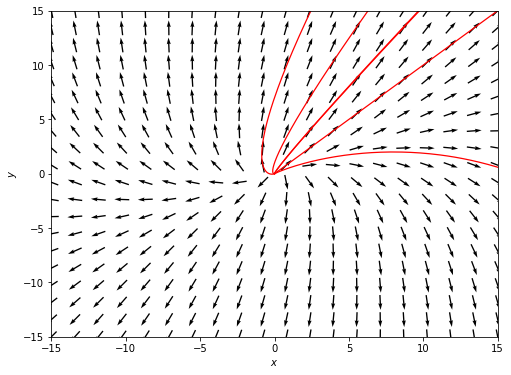

In [8]:
from scipy.integrate import ode
fig, ax = plt.subplots(figsize=(8, 6))

#Vector field
X, Y = np.meshgrid(np.linspace(-15, 15, 20), np.linspace(-15, 15, 20))
U = 2 * X + Y
V = - X + 4 * Y
#Normalize arrows
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

ax.quiver(X, Y, U, V, scale=30, pivot='mid')

## Vector field function
def vf(t,x):
    dx=np.zeros(2)
    dx[0] = 2 * x[0] + x[1]
    dx[1] = - x[0] + 4 * x[1]
    return dx

#Solution curves
t0 = 0
tEnd = 10
dt = 0.01
r = ode(vf).set_integrator('vode', method='bdf', max_step=dt)
#### Need to tweak the initial conditions here ###
'''
x_ini = np.linspace(-5, 5, 10)
y_ini = np.linspace(-5, 5, 10)
for x_ic in x_ini:
    for y_ic in y_ini:
        Y = []
        T = []
        S = []
        r.set_initial_value([x_ic, y_ic], t0).set_f_params()
        while r.successful() and r.t + dt < tEnd:
            r.integrate(r.t + dt)
            Y.append(r.y)

        S=np.array(np.real(Y))
        ax.plot(S[:,0],S[:,1], color = 'blue', lw = 1.25)
        
'''

for ic in [[8, 2], [0, 1], [0, 7], [3, 5], [5, 8], [8, 8],]:
    x_ini, y_ini = ic
    Y = []
    T = []
    S = []
    r.set_initial_value([x_ini, y_ini], t0).set_f_params()
    while r.successful() and r.t - dt > -10:
        r.integrate(r.t - dt)
        Y.append(r.y)

    Y = Y[::-1]
    r.set_initial_value([x_ini, y_ini], t0).set_f_params()
    while r.successful() and r.t + dt <= tEnd:
        r.integrate(r.t + dt)
        Y.append(r.y)

    S = np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = 'red', lw = 1.25)
    

plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()    